### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [137]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
29,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
31,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1


2. Investigate the dataset for missing or problematic data.

In [16]:
data.info() # understand the data types and missing values

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

In [10]:
data.describe() # understand the distribution of the data

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
data.isnull().sum() # check for missing values

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [13]:
data['car'].value_counts() # check the unique values in the column
data.drop('car', axis=1, inplace=True) # drop the car column since it has lots of missing values and the data is not useful
data.dropna(inplace=True) # drop the rows with missing values


In [18]:
data['coupon'].value_counts() # check the unique values in the column
data['occupation'].value_counts() # check the unique values in the column

occupation
Unemployed                                   1814
Student                                      1497
Computer & Mathematical                      1368
Sales & Related                              1072
Education&Training&Library                    855
Management                                    772
Office & Administrative Support               617
Arts Design Entertainment Sports & Media      564
Business & Financial                          516
Retired                                       473
Food Preparation & Serving Related            276
Healthcare Support                            242
Healthcare Practitioners & Technical          222
Legal                                         219
Community & Social Services                   219
Transportation & Material Moving              218
Protective Service                            175
Architecture & Engineering                    175
Life Physical Social Science                  170
Construction & Extraction              

4. What proportion of the total observations chose to accept the coupon? 



In [21]:
#Percentage of the total observations chose to accept the coupon
data['Y'].value_counts(normalize=True) * 100

Y
1    56.933521
0    43.066479
Name: proportion, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Bar'),
  Text(3, 0, 'Carry out & Take away'),
  Text(4, 0, 'Restaurant(20-50)')])

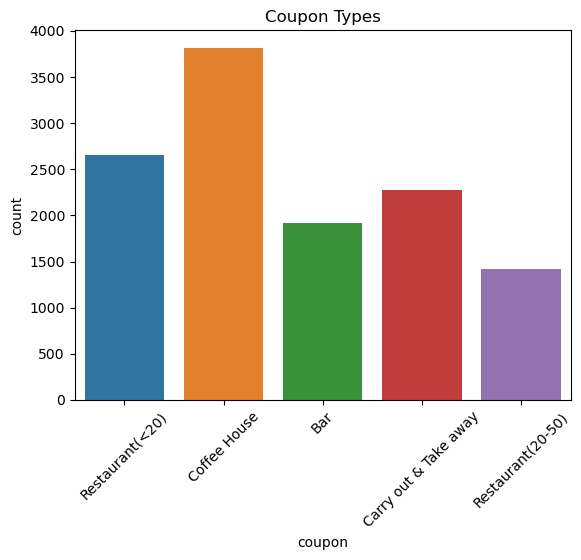

In [36]:
#Use a bar plot to visualize the `coupon` column.
#data['coupon'].value_counts().plot(kind='bar')

#tilt the x-axis labels
sns.countplot(data, x='coupon')
plt.title('Coupon Types')
plt.xticks(rotation=45)


6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='temperature', ylabel='Count'>

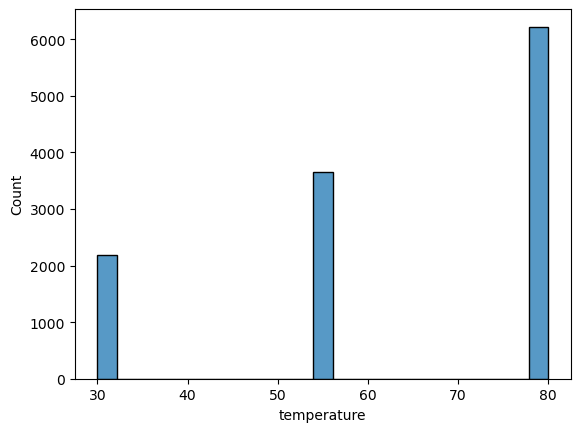

In [37]:
#6. Use a histogram to visualize the temperature column.
sns.histplot(data['temperature'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [40]:
df_bar=data[data['coupon']=='Bar']
df_bar['coupon'].value_counts(normalize=True) * 100


coupon
Bar    100.0
Name: proportion, dtype: float64

2. What proportion of bar coupons were accepted?


In [41]:
df_bar['Y'].value_counts(normalize=True) * 100

Y
0    58.808155
1    41.191845
Name: proportion, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [74]:
#Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
df_bar['3 Or Fewer'] = np.where(df_bar['Bar'].isin(['never','1~3']), 1, 0)

df_bar['3 Or Fewer'].value_counts()
#filter the data by Y column and group the data by the bar column 
df_bar.groupby('3 Or Fewer')['Y'].mean() * 100



/var/folders/6k/k6tm2t257jd_sdbv6xthypcw0000gn/T/ipykernel_68385/2315126368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar['3 Or Fewer'] = np.where(df_bar['Bar'].isin(['never','1~3']), 1, 0)


3 Or Fewer
0    52.815013
1    33.761782
Name: Y, dtype: float64

In [68]:
df_bar['Bar'].value_counts(normalize=True) * 100

Bar
never    41.191845
less1    28.907475
1~3      19.811814
4~8       7.684266
gt8       2.404600
Name: proportion, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [117]:
#df_bar['1 Or More'] = np.where(df_bar['Bar'].isin(['4~8','1~3','gt8']), 1, 0)

#df_bar['1 Or More'].value_counts()
#filter the data by Y column and group the data by the bar column 
print("Acceptance rate of drivers who go to bar more than once a month and are over the age of 25: {:.2f}".format(df_bar.query('(`1 Or More` == 1) and (`age` in["below21","21" ] )')['Y'].mean() * 100))

print("Acceptance rate of all others:{:.2f}".format(df_bar.query('(`1 Or More` == 0) and (`age` not in["below21","21" ] )')['Y'].mean() * 100))


Acceptance rate of drivers who go to bar more than once a month and are over the age of 25: 67.46
Acceptance rate of all others:26.74


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [86]:
df_bar['passanger'].value_counts(normalize=True) * 100

passanger
Alone        59.644537
Friend(s)    16.623105
Partner      13.591218
Kid(s)       10.141140
Name: proportion, dtype: float64

In [118]:
print("Acceptance rate of drivers who go to bar more than once a month:{:.2f}".format(df_bar.query('(`1 Or More` == 1)')['Y'].mean() * 100))    

print("Acceptance rate of drivers who had passengers that were not a kid and had occupations other than farming, fishing, or forestry:{:.2f}".format(df_bar.query('(`passanger` not in ["Kid(s)"]) and (`occupation` not in ["Farming Fishing & Forestry"])')['Y'].mean() * 100))

Acceptance rate of drivers who go to bar more than once a month:68.53
Acceptance rate of drivers who had passengers that were not a kid and had occupations other than farming, fishing, or forestry:43.49


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [95]:
df_bar['maritalStatus'].value_counts(normalize=True) * 100

maritalStatus
Married partner      43.544171
Single               33.350758
Unmarried partner    18.400418
Divorced              3.815996
Widowed               0.888657
Name: proportion, dtype: float64

In [119]:
print("Acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed:{:.2f}".format(df_bar.query('(`1 Or More` == 1) and (`passanger` not in ["Kid(s)"]) and (`maritalStatus` not in ["Widowed"])')['Y'].mean() * 100))


Acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed:70.94


In [120]:
df_bar['age'].value_counts(normalize=True) * 100

print("Acceptance rate of drivers who go to bars more than once a month and are under the age of 30:{:.2f}".format(df_bar.query('(`1 Or More` == 1) and (`age` in["below21","21","26" ] )')['Y'].mean() * 100))

Acceptance rate of drivers who go to bars more than once a month and are under the age of 30:71.95


In [121]:
df_bar['RestaurantLessThan20'].value_counts(normalize=True) * 100
df_bar['income'].value_counts(normalize=True) * 100
print("Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K:{:.2f}".format(df_bar.query('(`RestaurantLessThan20` in ["4~8","gt8"]) and (`income` in["Less than $12500","$12500 - $24999","$25000 - $37499","$37500 - $49999" ] )')['Y'].mean() * 100))


Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K:45.65


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Based on the observations
- Drivers who go to bar atleast once a month and aged below 30 years has the most acceptance rate for Bar coupons.
- The following User Attributes predict the probability of accepting Bar coupon
    - Age less than 30
    - Visiting the bar at least once a month
- The following Contextual Attributes predict the probability of accepting Bar coupon
    - Not having kids as passengers




### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I'm exploring the characteristics of passengers who accept Restaurant coupon that is less than $20

In [147]:
#create a dataframe for coupon type Restaurant(<20)
df_rest=data[data['coupon']=='Restaurant(<20)']
df_rest['coupon'].value_counts(normalize=True) * 100


coupon
Restaurant(<20)    100.0
Name: proportion, dtype: float64

Text(0.5, 0, 'Income')

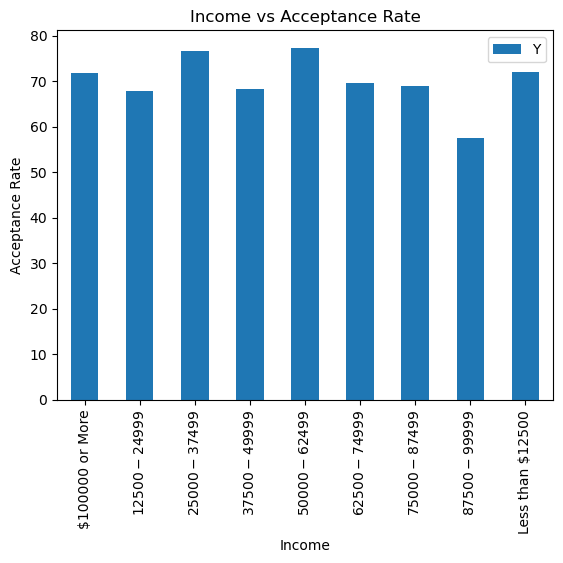

In [148]:
#group the data by the income column and calculate the acceptance rate
(df_rest.groupby('income').agg({'Y':'mean'})*100).plot(kind='bar')
plt.title('Income vs Acceptance Rate')
plt.ylabel('Acceptance Rate')
plt.xlabel('Income')


Text(0.5, 0, 'Destination')

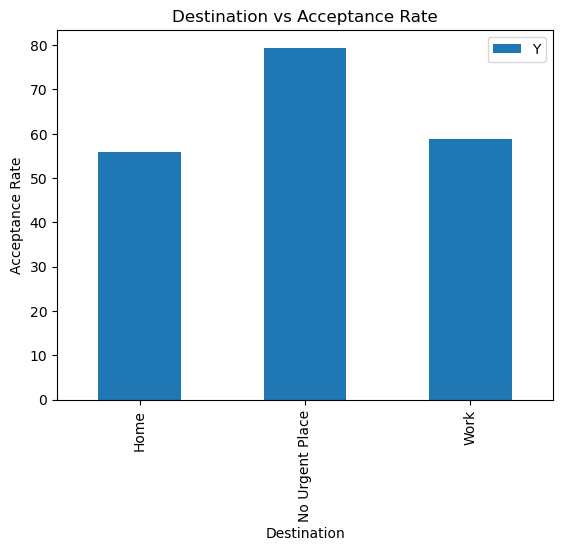

In [149]:
#group the data by the destination column and calculate the acceptance rate
(df_rest.groupby('destination').agg({'Y':'mean'})*100).plot(kind='bar')
plt.title('Destination vs Acceptance Rate')
plt.ylabel('Acceptance Rate')
plt.xlabel('Destination')

In [150]:
#group the data by the distance to the coupon place column and calculate the acceptance rate
print(df_rest.groupby('toCoupon_GEQ5min').agg({'Y':'mean'})*100)
print(df_rest.groupby('toCoupon_GEQ15min').agg({'Y':'mean'})*100)
print(df_rest.groupby('toCoupon_GEQ25min').agg({'Y':'mean'})*100)
#toCoupon_GEQ5min
#direction_same

                          Y
toCoupon_GEQ5min           
1                 70.900867
                           Y
toCoupon_GEQ15min           
0                  75.765827
1                  64.864865
                           Y
toCoupon_GEQ25min           
0                  75.657337
1                  32.881356


In [151]:
#group the data by the direction column and calculate the acceptance rate
print(df_rest.groupby('direction_same').agg({'Y':'mean'})*100)
print(df_rest.groupby('direction_opp').agg({'Y':'mean'})*100)


                        Y
direction_same           
0               72.547213
1               63.485477
                       Y
direction_opp           
0              63.485477
1              72.547213


In [153]:
#group the data by various other columns and calculate the acceptance rate

print(df_rest.groupby('expiration').agg({'Y':'mean'})*100)
print(df_rest.groupby('age').agg({'Y':'mean'})*100)
print(df_rest.groupby('passanger').agg({'Y':'mean'})*100)
print(df_rest.groupby('weather').agg({'Y':'mean'})*100)
print(df_rest.groupby('temperature').agg({'Y':'mean'})*100)
print(df_rest.groupby('time').agg({'Y':'mean'})*100)
print(df_rest.groupby('coupon').agg({'Y':'mean'})*100)
print(df_rest.groupby('maritalStatus').agg({'Y':'mean'})*100)
print(df_rest.groupby('has_children').agg({'Y':'mean'})*100)

                    Y
expiration           
1d          83.591331
2h          58.853784
                 Y
age               
21       73.809524
26       74.187380
31       70.813397
36       64.768683
41       71.604938
46       75.000000
50plus   63.947368
below21  73.728814
                   Y
passanger           
Alone      64.087591
Friend(s)  80.354880
Kid(s)     71.084337
Partner    78.367347
                 Y
weather           
Rainy    39.375000
Snowy    49.579832
Sunny    76.825843
                     Y
temperature           
30           53.728489
55           73.058637
80           75.983989
              Y
time           
10AM  71.777003
10PM  50.790068
2PM   81.363636
6PM   82.657343
7AM   58.759124
                         Y
coupon                    
Restaurant(<20)  70.900867
                           Y
maritalStatus               
Divorced           62.711864
Married partner    69.245283
Single             73.313492
Unmarried partner  72.522523
Widowed            

### Some observations based on the exploration so far
- Income is not a big predictor of coupon acceptane
- Acceptance rate is high when people are travelling to a not so urgent place
- Acceptance rate is high when the weather is sunny compared to snowy or rainy
- Drivers travelling alone has lowest acceptance rate
- Below in their 20s or in their 40 has higher acceptance rate
- Coupon that has longer expiration date has higher acceptance rate
- Coupon has highest acceptance rate in the evening around 6 PM
